<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p402_pandas_2020%EB%85%84_%EC%9D%B8%EA%B5%AC%EC%B4%9D%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###구글 코랩에서 한글 문제 해결
- 아래 코드 설치를 한다
- 코랩 런타임 -> 런타임 다시 시작을 수행한다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


### 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python/data

Mounted at /content/drive
/content/drive/MyDrive/python/data


### import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

https://kosis.kr/index/index.do

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 0: invalid continuation byte

뜰 경우 encoding='cp949'처리

In [ ]:
#저장한 인구통계자료 불러오기
df_kosis = pd.read_csv('./행정구역_시군구_별_성별_인구수_2020.csv', encoding='cp949')
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [ ]:
df_kosis.tail()

,행정구역(시군구)별,2020,2020.1,2020.2
14,전라북도,1804104,896874,907230
15,전라남도,1851549,930615,920934
16,경상북도,2639422,1329211,1310211
17,경상남도,3340216,1681423,1658793
18,제주특별자치도,674635,338609,336026


In [ ]:
df_kosis.sample()

,행정구역(시군구)별,2020,2020.1,2020.2
3,부산광역시,3391946,1661000,1730946


In [ ]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  19 non-null     object
 1   2020        19 non-null     object
 2   2020.1      19 non-null     object
 3   2020.2      19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [ ]:
df_kosis.describe()

,행정구역(시군구)별,2020,2020.1,2020.2
count,19,19,19,19
unique,19,19,19,19
top,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
freq,1,1,1,1


In [ ]:
df_kosis.columns
#출력결과
#Index(['행정구역(시군구)별', '2020', '2020.1', '2020.2'], dtype='object')
#2020.1은 남자 2020.2는 여자를 나타냄

Index(['행정구역(시군구)별', '2020', '2020.1', '2020.2'], dtype='object')

In [ ]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [ ]:
#위 결과에서 0번째 인덱스의 row제거('행정구역(시군구)별	총인구수 (명)	남자인구수 (명)	여자인구수 (명)'ㅇㄹ 제거 필요없으므로 날림)
df = df_kosis[df_kosis['행정구역(시군구)별']!='행정구역(시군구)별'].copy() #행정구역(시군구)별로 들어가는 행이 아닌 것만 카피해서 가져온다.
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885


In [ ]:
# 위 결과에서 1번째 인덱스의 row제거(전국	51829023	25841029	25987994)
df = df[df['행정구역(시군구)별'] != '전국'].copy()
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [ ]:
#행 삭제됐는지 확인
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [ ]:
#행정구역(시군구)별, 2020 대상의 데이터 가져오기
#남녀 구분한 2020.1 2020.2 열 빼고 가져오기

#fancy indexing이용
#df_2020 = df[['행정구역(시군구)별', '2020']] 

#df_2020 = df.iloc[:, 0:2]
#df_2020 = df.iloc[:, [0,1]]

df_2020 = df.loc[:, '행정구역(시군구)별': '2020']

df_2020

,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [ ]:
#열 삭제 됐는지 확인
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
dtypes: object(2)
memory usage: 408.0+ bytes


In [ ]:
print(dir(plt))

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_auto_draw_if_interactive', '_backend_mod', '_get_running_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setp', '_setup_pyplot_info_docstrings', '_show', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axvline', 'a

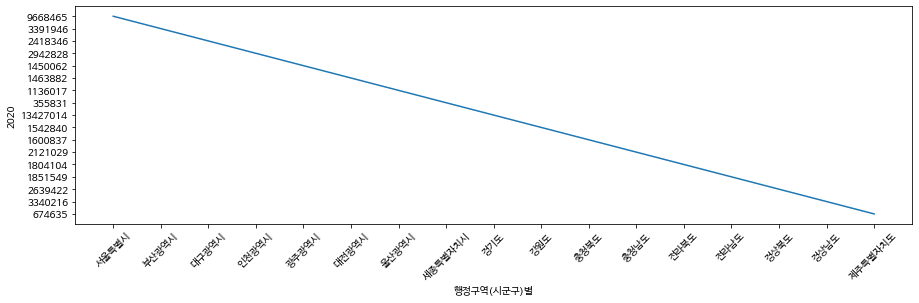

In [ ]:
#y축('2020') object 이므로 아래처럼 그래프가 그려진다.

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
#plt.xticks(rotation=45)  #글씨가 길어서 겹치지 않게 45도 기울여놓음
#plt.plot(df['행정구역(시군구)별'], df['2020'])
#plt.xlable('행정구역(시군구)별')
#plt.ylable('2020')
sns.lineplot(data=df, x='행정구역(시군구)별', y='2020')
plt.show()

In [ ]:
# '2020', '2020.1', '2020.2' 컬럼의 데이터를 int로 변환한다.

df['2020'] = [int(i) for i in df['2020']]
df['2020.1'] = [int(i) for i in df['2020.1']]
df['2020.2'] = [int(i) for i in df['2020.2']]

# s = [ (int(i), int(j), int(k))  for i,j,k in zip(df['2020'],df['2020.1'],df['2020.2'])]  #list로 받아옴
# p = np.array(s)#2차원 배열로 처리
# df['2020'],df['2020.1'],df['2020.2'] = p[:,0], p[:,1], p[:,2]

df['2020']



2      9668465
3      3391946
4      2418346
5      2942828
6      1450062
7      1463882
8      1136017
9       355831
10    13427014
11     1542840
12     1600837
13     2121029
14     1804104
15     1851549
16     2639422
17     3340216
18      674635
Name: 2020, dtype: int64

In [ ]:
#숫자로 바꼈는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     int64 
 2   2020.1      17 non-null     int64 
 3   2020.2      17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


In [ ]:
df_2020 = df[['행정구역(시군구)별', '2020']]

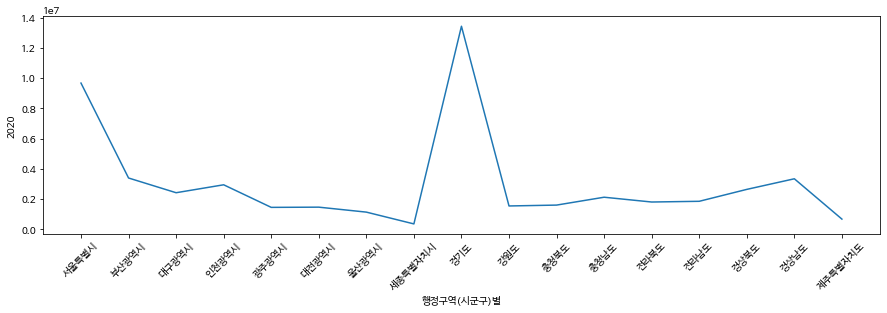

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45) 
# plt.plot(df['행정구역(시군구)별'], df['2020'])
# plt.xlabel('행정구역(시군구)별')
# plt.ylabel('2020')

sns.lineplot(data=df, x='행정구역(시군구)별', y='2020')   #별도의 lable이름을 설정하지 않아도 자동 출력

plt.show()

### 출생아수_시도_시_군_구_1997_2021

In [ ]:
df_kosis = pd.read_csv('./출생아수_시도_시_군_구_1997_2021.csv', encoding='cp949')
df_kosis.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1814,3533,1839,1694,3513,1818,1695,3034,1557,1477
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,627,1183,603,580,1043,549,494,888,458,430
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,452,890,470,420,792,411,381,685,363,322


In [ ]:
df_kosis.tail()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
14,전라북도,2579,1362,1217,2261,1150,1111,2364,1186,1178,...,294,588,302,286,543,264,279,524,280,244
15,전라남도,2685,1413,1272,2547,1286,1261,2457,1246,1211,...,341,632,290,342,640,332,308,542,281,261
16,경상북도,3362,1802,1560,3257,1751,1506,3343,1754,1589,...,517,889,465,424,961,500,461,775,393,382
17,경상남도,4020,2171,1849,3796,2003,1793,4021,2122,1899,...,631,1238,630,608,1135,604,531,975,497,478
18,제주특별자치도,734,373,361,737,386,351,750,419,331,...,176,330,185,145,254,126,128,215,106,109


In [ ]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 901 entries, 시군구별 to 2021.12.2
dtypes: object(901)
memory usage: 133.9+ KB


In [ ]:
df_kosis.shape  #19행 901열

(19, 901)

In [ ]:
pd.options.display.max_columns=829

In [ ]:
df_kosis.head(3)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,1997.04,1997.04.1,1997.04.2,1997.05,1997.05.1,1997.05.2,1997.06,1997.06.1,1997.06.2,1997.07,1997.07.1,1997.07.2,1997.08,1997.08.1,1997.08.2,1997.09,1997.09.1,1997.09.2,1997.10,1997.10.1,1997.10.2,1997.11,1997.11.1,1997.11.2,1997.12,1997.12.1,1997.12.2,1998.01,1998.01.1,1998.01.2,1998.02,1998.02.1,1998.02.2,1998.03,1998.03.1,1998.03.2,1998.04,1998.04.1,1998.04.2,1998.05,1998.05.1,1998.05.2,1998.06,1998.06.1,1998.06.2,1998.07,1998.07.1,1998.07.2,1998.08,1998.08.1,1998.08.2,1998.09,1998.09.1,1998.09.2,1998.10,1998.10.1,1998.10.2,1998.11,1998.11.1,1998.11.2,1998.12,1998.12.1,1998.12.2,1999.01,1999.01.1,1999.01.2,1999.02,1999.02.1,1999.02.2,1999.03,1999.03.1,1999.03.2,1999.04,1999.04.1,1999.04.2,1999.05,1999.05.1,1999.05.2,1999.06,1999.06.1,1999.06.2,1999.07,1999.07.1,1999.07.2,1999.08,1999.08.1,1999.08.2,1999.09,1999.09.1,1999.09.2,1999.10,1999.10.1,1999.10.2,1999.11,1999.11.1,1999.11.2,1999.12,1999.12.1,1999.12.2,2000.01,2000.01.1,2000.01.2,2000.02,2000.02.1,2000.02.2,2000.03,2000.03.1,2000.03.2,2000.04,2000.04.1,2000.04.2,2000.05,2000.05.1,2000.05.2,2000.06,2000.06.1,2000.06.2,2000.07,2000.07.1,2000.07.2,2000.08,2000.08.1,2000.08.2,2000.09,2000.09.1,2000.09.2,2000.10,2000.10.1,2000.10.2,2000.11,2000.11.1,2000.11.2,2000.12,2000.12.1,2000.12.2,2001.01,2001.01.1,2001.01.2,2001.02,2001.02.1,2001.02.2,2001.03,2001.03.1,2001.03.2,2001.04,2001.04.1,2001.04.2,2001.05,2001.05.1,2001.05.2,2001.06,2001.06.1,2001.06.2,2001.07,2001.07.1,2001.07.2,2001.08,2001.08.1,2001.08.2,2001.09,2001.09.1,2001.09.2,2001.10,2001.10.1,2001.10.2,2001.11,2001.11.1,2001.11.2,2001.12,2001.12.1,2001.12.2,2002.01,2002.01.1,2002.01.2,2002.02,2002.02.1,2002.02.2,2002.03,2002.03.1,2002.03.2,2002.04,2002.04.1,2002.04.2,2002.05,2002.05.1,2002.05.2,2002.06,2002.06.1,2002.06.2,2002.07,2002.07.1,2002.07.2,2002.08,2002.08.1,2002.08.2,2002.09,2002.09.1,2002.09.2,2002.10,2002.10.1,2002.10.2,2002.11,2002.11.1,2002.11.2,2002.12,2002.12.1,2002.12.2,2003.01,2003.01.1,2003.01.2,2003.02,2003.02.1,2003.02.2,2003.03,2003.03.1,2003.03.2,2003.04,2003.04.1,2003.04.2,2003.05,2003.05.1,2003.05.2,2003.06,2003.06.1,2003.06.2,2003.07,2003.07.1,2003.07.2,2003.08,2003.08.1,2003.08.2,2003.09,2003.09.1,2003.09.2,2003.10,2003.10.1,2003.10.2,2003.11,2003.11.1,2003.11.2,2003.12,2003.12.1,2003.12.2,2004.01,2004.01.1,2004.01.2,2004.02,2004.02.1,2004.02.2,2004.03,2004.03.1,2004.03.2,2004.04,2004.04.1,2004.04.2,2004.05,2004.05.1,2004.05.2,2004.06,2004.06.1,2004.06.2,2004.07,2004.07.1,2004.07.2,2004.08,2004.08.1,2004.08.2,2004.09,2004.09.1,2004.09.2,2004.10,2004.10.1,2004.10.2,2004.11,2004.11.1,2004.11.2,2004.12,2004.12.1,2004.12.2,2005.01,2005.01.1,2005.01.2,2005.02,2005.02.1,2005.02.2,2005.03,2005.03.1,2005.03.2,2005.04,2005.04.1,2005.04.2,2005.05,2005.05.1,2005.05.2,2005.06,2005.06.1,2005.06.2,2005.07,2005.07.1,2005.07.2,2005.08,2005.08.1,2005.08.2,2005.09,2005.09.1,2005.09.2,2005.10,2005.10.1,2005.10.2,2005.11,2005.11.1,2005.11.2,2005.12,2005.12.1,2005.12.2,2006.01,2006.01.1,2006.01.2,2006.02,2006.02.1,2006.02.2,2006.03,2006.03.1,2006.03.2,2006.04,2006.04.1,2006.04.2,2006.05,2006.05.1,2006.05.2,2006.06,2006.06.1,2006.06.2,2006.07,2006.07.1,2006.07.2,2006.08,2006.08.1,2006.08.2,2006.09,2006.09.1,2006.09.2,2006.10,2006.10.1,2006.10.2,2006.11,2006.11.1,2006.11.2,2006.12,2006.12.1,2006.12.2,2007.01,2007.01.1,2007.01.2,2007.02,2007.02.1,2007.02.2,2007.03,2007.03.1,2007.03.2,2007.04,2007.04.1,2007.04.2,2007.05,2007.05.1,2007.05.2,2007.06,2007.06.1,2007.06.2,2007.07,2007.07.1,2007.07.2,2007.08,2007.08.1,2007.08.2,2007.09,2007.09.1,2007.09.2,2007.10,2007.10.1,2007.10.2,2007.11,2007.11.1,2007.11.2,2007.12,2007.12.1,2007.12.2,2008.01,2008.01.1,2008.01.2,2008.02,2008.02.1,2008.02.2,2008.03,2008.03.1,2008.03.2,2008.04,2008.04.1,2008.04.2,2008.05,2008.05.1,2008.05.2,2008.06,2008.06.1,...,2010.07,2010.07.1,2010.07.2,2010.08,2010.08.1,2010.08.2,2010.09,2010.09.1,2010.09.2,2010.10,2010.10.1,2010.10.2,2010.11,2010.11.1,2010.1

In [ ]:
df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [ ]:
df.shape

(17100, 3)

In [ ]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df[df['시군구별']=='시군구별']

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
19,시군구별,1997.01.1,남자 (명)
38,시군구별,1997.01.2,여자 (명)
57,시군구별,1997.02,계 (명)
76,시군구별,1997.02.1,남자 (명)
...,...,...,...
17005,시군구별,2021.11.1,남자 (명)
17024,시군구별,2021.11.2,여자 (명)
17043,시군구별,2021.12,계 (명)
17062,시군구별,2021.12.1,남자 (명)


In [ ]:
# '시군구별'이 아닌 데이터만 뽑아온다.
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646
...,...,...,...
17095,전라북도,2021.12.2,244
17096,전라남도,2021.12.2,261
17097,경상북도,2021.12.2,382
17098,경상남도,2021.12.2,478


In [ ]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16200 non-null  object
 1   variable  16200 non-null  object
 2   value     16200 non-null  object
dtypes: object(3)
memory usage: 506.2+ KB


In [ ]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [ ]:
df.sample(5)

,시군구별,variable,value
3280,충청북도,2001.10.1,686
147,전라북도,1997.03.1,1186
615,대전광역시,1997.11.2,782
2667,대전광역시,2000.11.2,746
5541,충청북도,2005.02,1089


In [ ]:
#Series로 리턴
print(type(df['variable']))

#Series에서 'str' 자원이 제공되는지 검색 (있으면 True/없으면 False)
print('str' in dir(pd.Series))

#Series를 문자열로 = StringMethods로 리턴
print(type(df['variable'].str))

#Series로 리턴(split하면)
#print(type(df['variable'].str.split('.')))
#split로 나누기(연,월,성별 구분)
print(df['variable'].str.split('.')[1][0])  #연
print(df['variable'].str.split('.')[1][1])  #월

#DataFrame으로 리턴(Series로 리턴된 위의 결과를)
print(type(df['variable'].str.split('.', expand=True)))
print(df['variable'].str.split('.', expand=True))


<class 'pandas.core.series.Series'>
True
<class 'pandas.core.strings.accessor.StringMethods'>
1997
01
<class 'pandas.core.frame.DataFrame'>
          0   1     2
1      1997  01  None
2      1997  01  None
3      1997  01  None
4      1997  01  None
5      1997  01  None
...     ...  ..   ...
17095  2021  12     2
17096  2021  12     2
17097  2021  12     2
17098  2021  12     2
17099  2021  12     2

[16200 rows x 3 columns]


In [ ]:
df['연도'] = df['variable'].str.split('.', expand=True)[0]
df['월'] = df['variable'].str.split('.', expand=True)[1]
df['성별'] = df['variable'].str.split('.', expand=True)[2]

In [ ]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
5021,인천광역시,2004.05,2083,2004,05,None
12470,광주광역시,2015.03.2,559,2015,03,2
2346,세종특별자치시,2000.06,-,2000,06,None
6245,충청남도,2006.02.1,774,2006,02,1
118,대구광역시,1997.03,3337,1997,03,None


In [ ]:
# types: object(6) 전부 문자열
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      16200 non-null  object
 1   variable  16200 non-null  object
 2   value     16200 non-null  object
 3   연도        16200 non-null  object
 4   월         16200 non-null  object
 5   성별        10800 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
# 성별에 None이 포함되어 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [ ]:
# None이 아닌 unique 개수만 리턴한다.
df['성별'].nunique()

2

In [ ]:
#unoque값 별 개수 리턴
df['성별'].value_counts()

1    5400
2    5400
Name: 성별, dtype: int64

In [ ]:
#None값을 '전체'로 바꿔준다.
df['성별'] = df['성별'].fillna('전체')

In [ ]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
4613,전라남도,2003.09.2,693,2003,09,2
7478,강원도,2007.12,962,2007,12,전체
15919,경상북도,2020.04,1118,2020,04,전체
11219,세종특별자치시,2013.05.2,45,2013,05,2
14546,강원도,2018.04,731,2018,04,전체


In [ ]:
#1을 '남'으로 2를 '여'로 바꾼다
df['성별'] = df['성별'].replace('1', '남').replace('2','여')
df['성별'].unique()

array(['전체', '남', '여'], dtype=object)

In [ ]:
df.sample(5)

,시군구별,variable,value,연도,월,성별
10655,전라남도,2012.07.2,682,2012,07,여
10734,제주특별자치도,2012.09,497,2012,09,전체
10746,강원도,2012.09.1,571,2012,09,남
6968,전라북도,2007.03,1512,2007,03,전체
10480,강원도,2012.04.2,474,2012,04,여


In [ ]:
#Series에서만 사용할 수 있다.
# 빈도수(개수)를 계산한다.
df['성별'].value_counts()

전체    5400
남     5400
여     5400
Name: 성별, dtype: int64

In [ ]:
df.columns

Index(['시군구별', 'variable', 'value', '연도', '월', '성별'], dtype='object')

In [ ]:
#df = df.rename(mapper={'기간':'variable'}, axis=1)  #axis=0 : 행 명 바꿈/axis=1:열 명 바꿈 (실제 데이터에 반영o)
#df = df.rename(columns={'variable':'기간', 'value':'출생아 수'}, inplace=True)  #실제 데이터에 반영o
df = df.rename(columns={'variable':'기간', 'value':'출생아 수'})  #실제 데이터에 반영o

#df.rename(columns={'variable':'기간', 'value':'출생아 수'}) #실제 데이터에는 반영x 확인용

df

,시군구별,기간,출생아 수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
...,...,...,...,...,...,...
17095,전라북도,2021.12.2,244,2021,12,여
17096,전라남도,2021.12.2,261,2021,12,여
17097,경상북도,2021.12.2,382,2021,12,여
17098,경상남도,2021.12.2,478,2021,12,여


In [ ]:
df['출생아 수'].unique()

array(['63268', '13205', '4201', ..., '106', '8454', '2612'], dtype=object)

In [ ]:
# '출생아 수' 컬럼에서 '-'을 찾기 위한 작업
df.sample(10)

,시군구별,기간,출생아 수,연도,월,성별
5671,세종특별자치시,2005.04.1,-,2005,04,남
5827,충청남도,2005.07,1355,2005,07,전체
8405,대전광역시,2009.04.1,574,2009,04,남
14378,전라북도,2018.01,994,2018,01,전체
7283,광주광역시,2007.08.2,600,2007,08,여
17082,전국,2021.12.2,8454,2021,12,여
15930,울산광역시,2020.04.1,305,2020,04,남
16040,대구광역시,2020.06.1,486,2020,06,남
15934,충청북도,2020.04.1,394,2020,04,남
4796,울산광역시,2004.01,1035,2004,01,전체


In [ ]:
#출생아 수 컬럼의 타입은 object이다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16200 non-null  object
 1   기간      16200 non-null  object
 2   출생아 수   16200 non-null  object
 3   연도      16200 non-null  object
 4   월       16200 non-null  object
 5   성별      16200 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
# 데이터가 없는 -를 NaN값(float)으로 바꿔줌
df['출생아 수']= df['출생아 수'].replace('-', np.nan)

In [ ]:
df.sample(10)

,시군구별,기간,출생아 수,연도,월,성별
9345,경상북도,2010.08.2,956,2010,08,여
12929,세종특별자치시,2015.11.2,115,2015,11,여
5327,대전광역시,2004.10.1,687,2004,10,남
3089,강원도,2001.07,1356,2001,07,전체
17096,전라남도,2021.12.2,261,2021,12,여
17058,전라남도,2021.12,542,2021,12,전체
8578,세종특별자치시,2009.07.1,NaN,2009,07,남
14422,전국,2018.02,27575,2018,02,전체
2341,대구광역시,2000.06,2321,2000,06,전체
4133,경기도,2003.01.1,5675,2003,01,남


In [ ]:
# ValueError: cannot convert float NaN to integer
# df['출생아 수'].astype(int)
# int로 바꾸려면 -값을 NaN(float)이 아닌 0(int)로 바꿔주면됨

#출생아 수를 문자열이 아닌 숫자로 바꿔준다(통계 등 연산을 위해)
df['출생아 수'] = df['출생아 수'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 1 to 17099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16200 non-null  object 
 1   기간      16200 non-null  object 
 2   출생아 수   15660 non-null  float64
 3   연도      16200 non-null  object 
 4   월       16200 non-null  object 
 5   성별      16200 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df.sample(10)

,시군구별,기간,출생아 수,연도,월,성별
6476,경상북도,2006.06.1,904.0,2006,06,남
529,경상북도,1997.10,3110.0,1997,10,전체
3141,광주광역시,2001.08,1376.0,2001,08,전체
234,광주광역시,1997.05,1799.0,1997,05,전체
11779,제주특별자치도,2014.03.1,231.0,2014,03,남
6011,대전광역시,2005.10.1,617.0,2005,10,남
4360,세종특별자치시,2003.05.1,NaN,2003,05,남
5604,제주특별자치도,2005.03,561.0,2005,03,전체
3913,제주특별자치도,2002.09.1,282.0,2002,09,남
14230,제주특별자치도,2017.10.1,223.0,2017,10,남


In [ ]:
df['출생아 수'].describe()

count    15660.000000
mean      2954.615581
std       6495.725504
min         30.000000
25%        604.000000
50%       1002.000000
75%       1875.250000
max      63268.000000
Name: 출생아 수, dtype: float64

### 전국별 성별 전체

In [ ]:
df_all = df[df['성별'] == '전체']
df_all.head()

,시군구별,기간,출생아 수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체


In [ ]:
df_all['성별'].unique()  #'전체'만 가져오므로 조건 맞게 줌

array(['전체'], dtype=object)

In [ ]:
df_all = df[(df['시군구별']=='전국') & (df['성별']=='전체')]  #연도월별 데이터만 나오게됨
df_all.head()

,시군구별,기간,출생아 수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체
115,전국,1997.03,62160.0,1997,03,전체
172,전국,1997.04,56949.0,1997,04,전체
229,전국,1997.05,55270.0,1997,05,전체


In [ ]:
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())

['전국']
['전체']


### 전국_전체 pandas를 통한 시각화 작업

In [ ]:
df_all.sample(5)

,시군구별,기간,출생아 수,연도,월,성별
7069,전국,2007.05,39913.0,2007,05,전체
5644,전국,2005.04,36605.0,2005,04,전체
3364,전국,2001.12,42103.0,2001,12,전체
16759,전국,2021.07,22364.0,2021,07,전체
1198,전국,1998.10,52709.0,1998,10,전체


In [ ]:
# 출생아 수  float64 숫자인지 확인
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 17044
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    300 non-null    object 
 1   기간      300 non-null    object 
 2   출생아 수   300 non-null    float64
 3   연도      300 non-null    object 
 4   월       300 non-null    object 
 5   성별      300 non-null    object 
dtypes: float64(1), object(5)
memory usage: 16.4+ KB


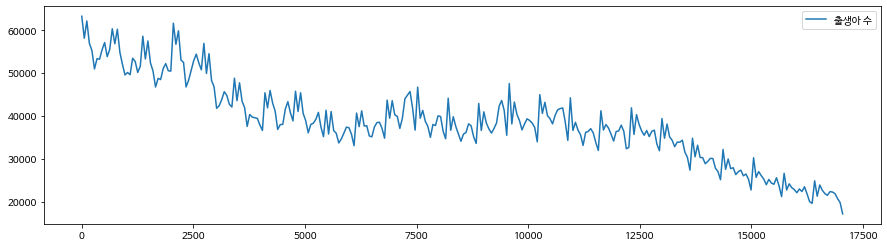

In [ ]:
#pandas를 이용해 시각화하면 인덱스값이 x축으로, 출생아 수가 y축으로 잡힘
df_all.plot(figsize=(15,4))

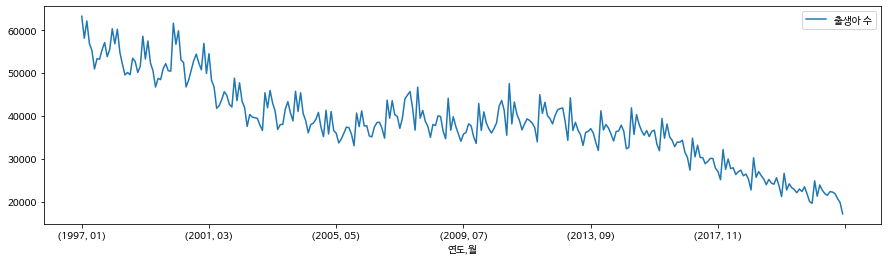

In [ ]:
#x축의 값을 연도,월로 잡아줌
df_all.set_index(['연도','월']).plot(figsize=(15,4))

In [ ]:
# 설정 인덱스를 원상복귀 시켜준다.(즉 연도, 월을 컬럼으로 되돌린다.)
df_all.reset_index(drop=True)  #인덱스 값도 함께 제거된다

,시군구별,기간,출생아 수,연도,월,성별
0,전국,1997.01,63268.0,1997,01,전체
1,전국,1997.02,58144.0,1997,02,전체
2,전국,1997.03,62160.0,1997,03,전체
3,전국,1997.04,56949.0,1997,04,전체
4,전국,1997.05,55270.0,1997,05,전체
...,...,...,...,...,...,...
295,전국,2021.08,22282.0,2021,08,전체
296,전국,2021.09,21905.0,2021,09,전체
297,전국,2021.10,20749.0,2021,10,전체
298,전국,2021.11,19829.0,2021,11,전체


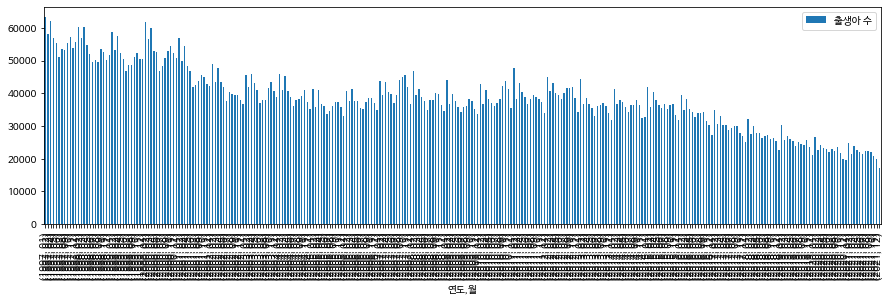

In [ ]:
#막대 그래프는 x축에 연도, 월은 모두 표현한다
#df_all.set_index(['연도','월']).plot(kind='bar', figsize=(15,4))
df_all.set_index(['연도','월']).plot.bar(figsize=(15,4))

In [ ]:
#최근 2년 데이터만 가져오기
df_all[-24:]    #아래에서 위로 24행만 가져오는 것(21년도 12개월+20년도 12개월)

In [ ]:
df_all['연도'].unique()

array(['2020', '2021'], dtype=object)

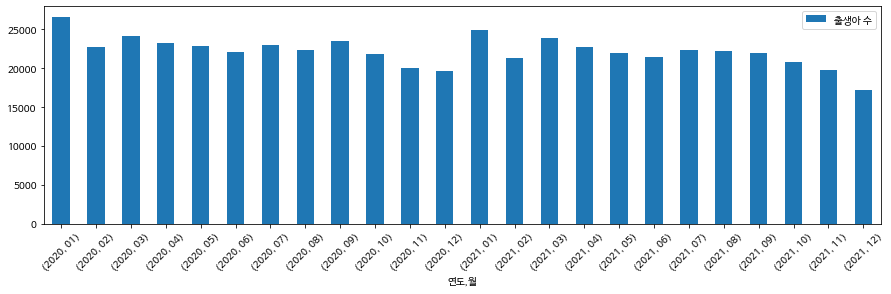

In [ ]:
#최근 2년(24개월) 데이터만 가져와서 그래프로 그려준다
df_all[-24:].set_index(['연도','월']).plot(kind='bar', figsize=(15,4), rot=45)   #rot=45 : 글씨 45도 기울기

In [ ]:
df['a'] = pd.Series([1,2,3])

In [ ]:
df.head()

,시군구별,기간,출생아 수,연도,월,성별,a
1,전국,1997.01,63268.0,1997,01,전체,2.0
2,서울특별시,1997.01,13205.0,1997,01,전체,3.0
3,부산광역시,1997.01,4201.0,1997,01,전체,NaN
4,대구광역시,1997.01,3345.0,1997,01,전체,NaN
5,인천광역시,1997.01,3646.0,1997,01,전체,NaN
